<a href="https://www.kaggle.com/code/lalit7881/digital-payment-fraud-detection-93-accuracy?scriptVersionId=299407693" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digital-payment-fraud-detection/Digital_Payment_Fraud_Detection_Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/digital-payment-fraud-detection/Digital_Payment_Fraud_Detection_Dataset.csv")

In [3]:
df.head()

,transaction_id,user_id,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,T1,U3756,18758.28,Transfer,UPI,Web,Hyderabad,895,14,1,25535.84,0,0.718,4,0
1,T2,U7899,47538.18,Payment,Wallet,iOS,Hyderabad,918,21,0,3955.85,0,0.525,9,0
2,T3,U1765,36613.10,Payment,Card,Android,Chennai,1506,8,4,22727.71,0,0.985,9,0
3,T4,U8850,29952.99,Payment,Wallet,iOS,Chennai,800,1,3,18095.89,0,0.797,2,0
4,T5,U9049,7843.13,Payment,UPI,Web,Delhi,301,4,1,9317.49,1,0.468,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            7500 non-null   object 
 1   user_id                   7500 non-null   object 
 2   transaction_amount        7500 non-null   float64
 3   transaction_type          7500 non-null   object 
 4   payment_mode              7500 non-null   object 
 5   device_type               7500 non-null   object 
 6   device_location           7500 non-null   object 
 7   account_age_days          7500 non-null   int64  
 8   transaction_hour          7500 non-null   int64  
 9   previous_failed_attempts  7500 non-null   int64  
 10  avg_transaction_amount    7500 non-null   float64
 11  is_international          7500 non-null   int64  
 12  ip_risk_score             7500 non-null   float64
 13  login_attempts_last_24h   7500 non-null   int64  
 14  fraud_la

In [5]:
df.describe()

,transaction_amount,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,24813.534161,1006.904533,11.435867,2.013600,15129.061027,0.100667,0.505026,4.995067,0.065200
std,14434.742371,575.632925,6.950899,1.421578,8597.760720,0.300907,0.289647,2.593879,0.246895
min,50.580000,10.000000,0.000000,0.000000,102.790000,0.000000,0.000000,1.000000,0.000000
25%,12272.785000,502.750000,5.000000,1.000000,7725.842500,0.000000,0.257000,3.000000,0.000000
50%,24715.550000,1018.000000,11.000000,2.000000,15074.810000,0.000000,0.502000,5.000000,0.000000
75%,37288.375000,1505.000000,18.000000,3.000000,22573.062500,0.000000,0.759000,7.000000,0.000000
max,49985.900000,1999.000000,23.000000,4.000000,29994.290000,1.000000,1.000000,9.000000,1.000000


In [6]:
df.isnull().sum()

transaction_id              0
user_id                     0
transaction_amount          0
transaction_type            0
payment_mode                0
device_type                 0
device_location             0
account_age_days            0
transaction_hour            0
previous_failed_attempts    0
avg_transaction_amount      0
is_international            0
ip_risk_score               0
login_attempts_last_24h     0
fraud_label                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

transaction_id               object
user_id                      object
transaction_amount          float64
transaction_type             object
payment_mode                 object
device_type                  object
device_location              object
account_age_days              int64
transaction_hour              int64
previous_failed_attempts      int64
avg_transaction_amount      float64
is_international              int64
ip_risk_score               float64
login_attempts_last_24h       int64
fraud_label                   int64
dtype: object

In [9]:
df.shape

(7500, 15)

In [10]:
df.columns

Index(['transaction_id', 'user_id', 'transaction_amount', 'transaction_type',
       'payment_mode', 'device_type', 'device_location', 'account_age_days',
       'transaction_hour', 'previous_failed_attempts',
       'avg_transaction_amount', 'is_international', 'ip_risk_score',
       'login_attempts_last_24h', 'fraud_label'],
      dtype='object')

In [11]:
df.nunique()

transaction_id              7500
user_id                     5106
transaction_amount          7499
transaction_type               3
payment_mode                   4
device_type                    3
device_location                5
account_age_days            1943
transaction_hour              24
previous_failed_attempts       5
avg_transaction_amount      7498
is_international               2
ip_risk_score               1000
login_attempts_last_24h        9
fraud_label                    2
dtype: int64

## Data visualizations

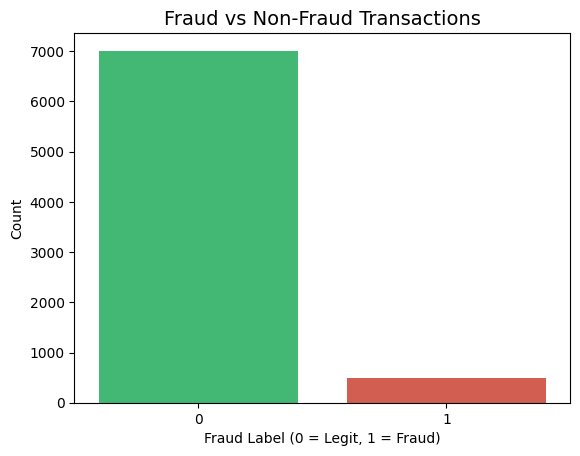

In [12]:
plt.figure()
sns.countplot(x="fraud_label", data=df, palette=["#2ecc71", "#e74c3c"])
plt.title("Fraud vs Non-Fraud Transactions", fontsize=14)
plt.xlabel("Fraud Label (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

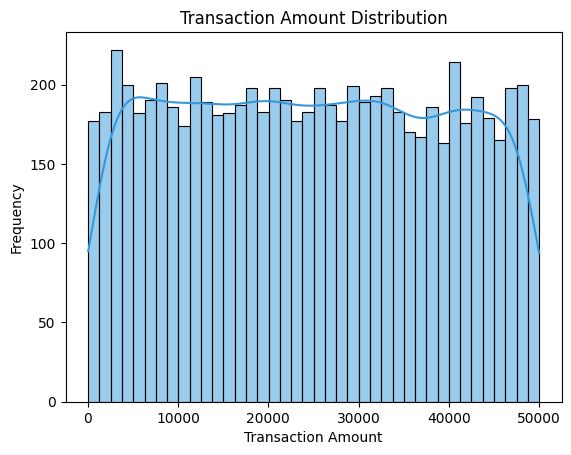

In [13]:
plt.figure()
sns.histplot(df["transaction_amount"], bins=40, color="#3498db", kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

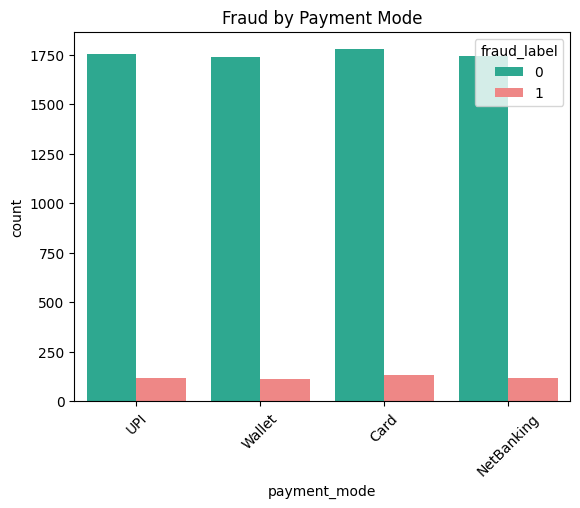

In [14]:
plt.figure()
sns.countplot(x="payment_mode", hue="fraud_label", data=df,
              palette=["#1abc9c", "#ff7675"])
plt.title("Fraud by Payment Mode")
plt.xticks(rotation=45)
plt.show()

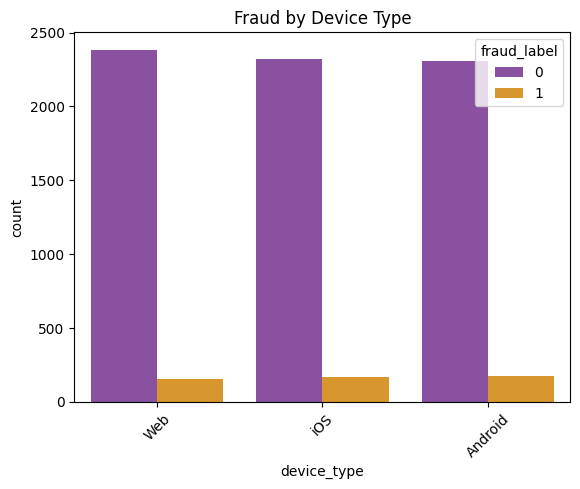

In [15]:
plt.figure()
sns.countplot(x="device_type", hue="fraud_label", data=df,
              palette=["#8e44ad", "#f39c12"])
plt.title("Fraud by Device Type")
plt.xticks(rotation=45)
plt.show()

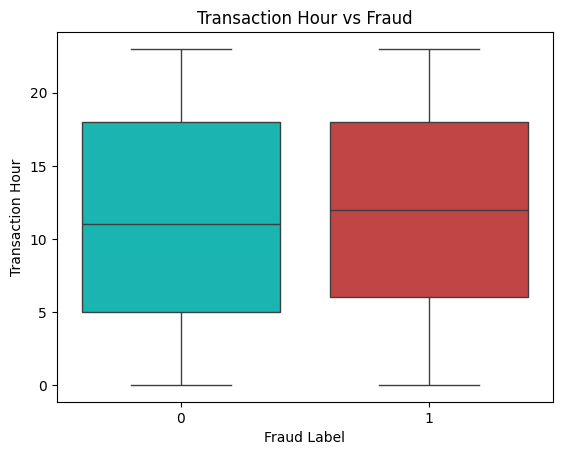

In [16]:
plt.figure()
sns.boxplot(x="fraud_label", y="transaction_hour",
            data=df, palette=["#00cec9", "#d63031"])
plt.title("Transaction Hour vs Fraud")
plt.xlabel("Fraud Label")
plt.ylabel("Transaction Hour")
plt.show()

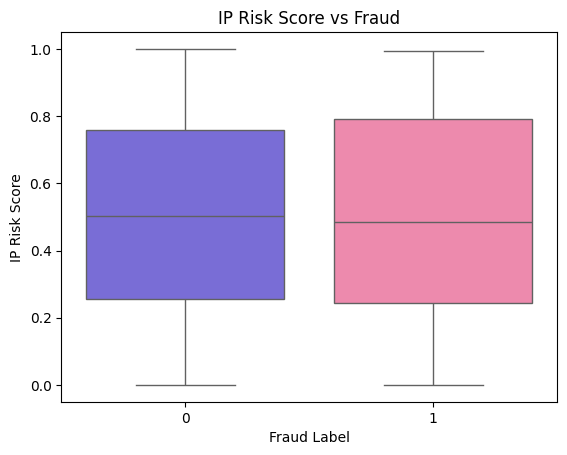

In [17]:
plt.figure()
sns.boxplot(x="fraud_label", y="ip_risk_score",
            data=df, palette=["#6c5ce7", "#fd79a8"])
plt.title("IP Risk Score vs Fraud")
plt.xlabel("Fraud Label")
plt.ylabel("IP Risk Score")
plt.show()


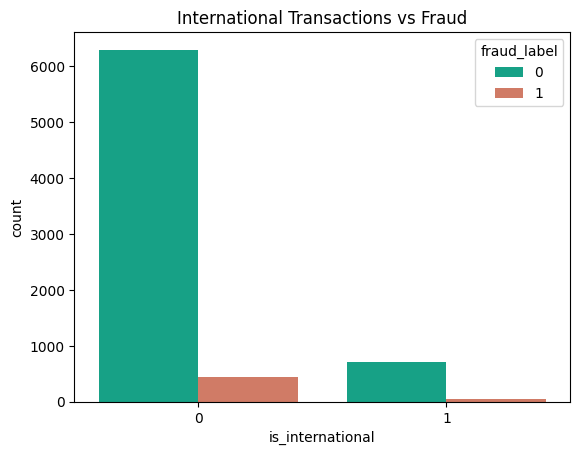

In [18]:
plt.figure()
sns.countplot(x="is_international", hue="fraud_label",
              data=df, palette=["#00b894", "#e17055"])
plt.title("International Transactions vs Fraud")
plt.show()

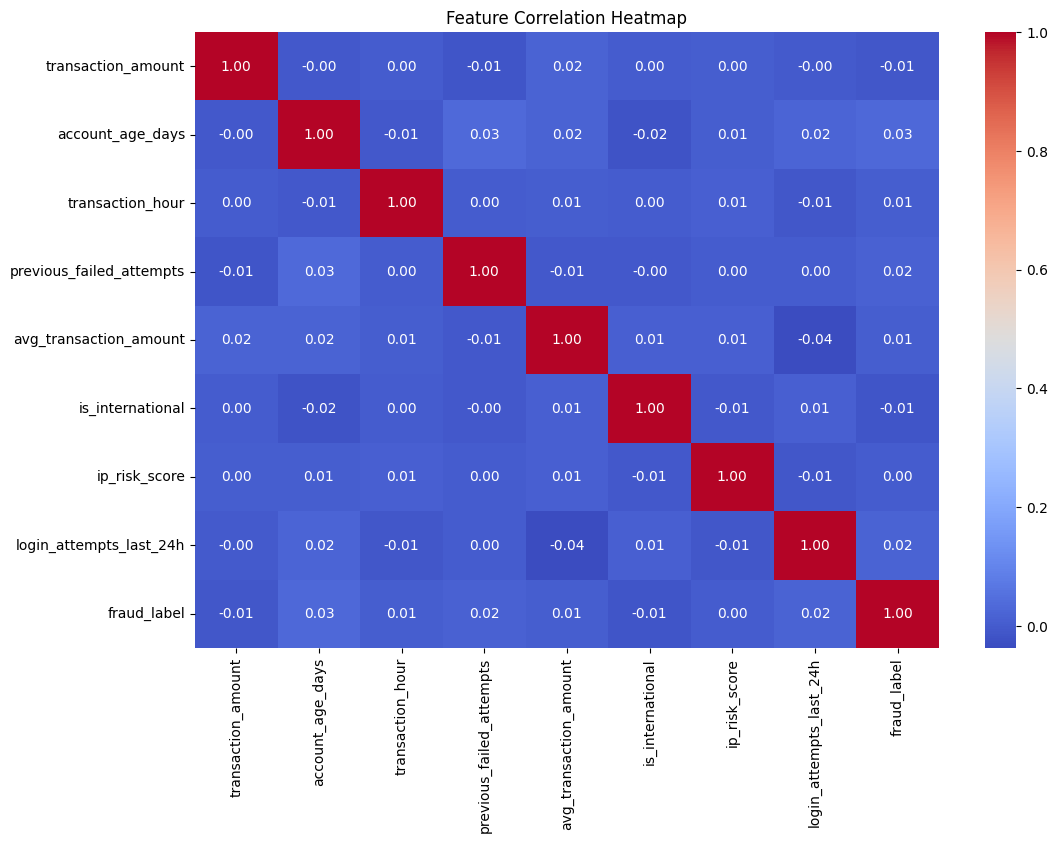

In [19]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature engg

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from collections import Counter

In [21]:
df = df.drop(["transaction_id", "user_id"], axis=1)

# Encode categorical columns
categorical_cols = [
    "transaction_type",
    "payment_mode",
    "device_type",
    "device_location"
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Class Distribution Before Split:", Counter(df["fraud_label"]))

Class Distribution Before Split: Counter({0: 7011, 1: 489})


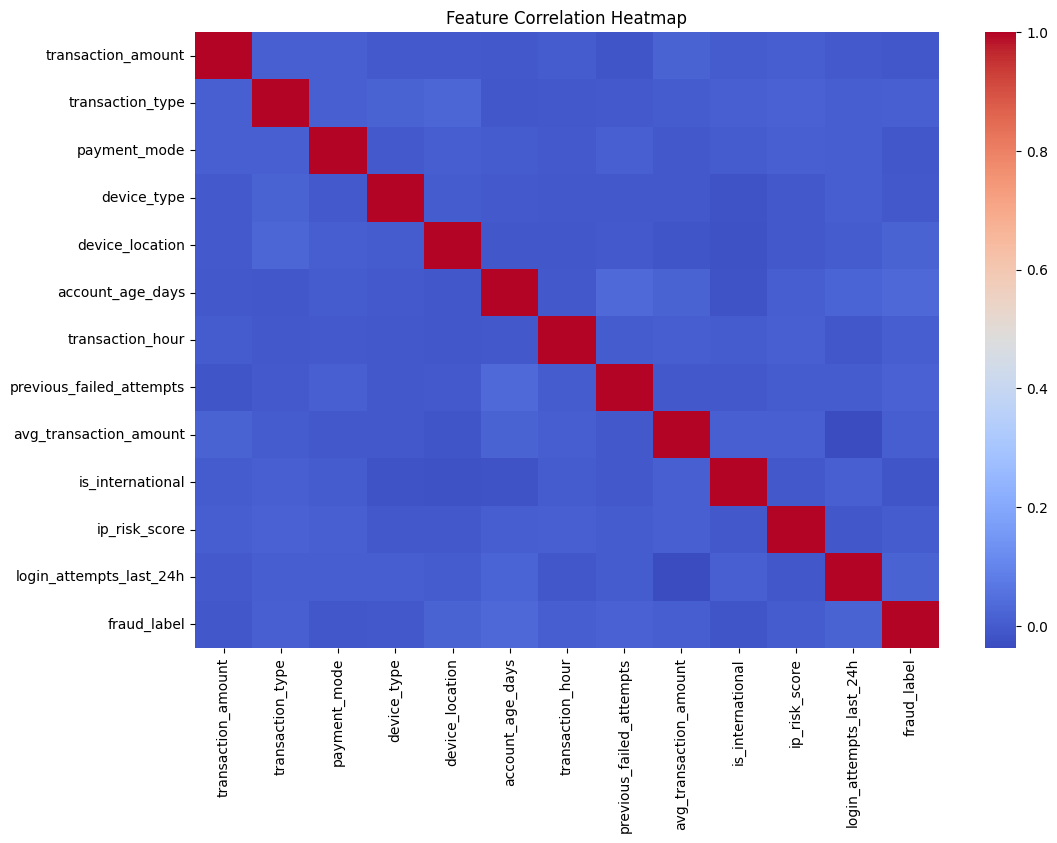

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
X = df.drop("fraud_label", axis=1)
y = df["fraud_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [24]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_sm))

After SMOTE: Counter({0: 5609, 1: 5609})


In [25]:
def evaluate_model(name, model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = "N/A"
    
    print("\n==============================")
    print(f"{name} Results")
    print("==============================")
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Logistic Regression Results
Accuracy: 0.5
ROC-AUC: 0.49431570060263763

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.50      0.65      1402
           1       0.06      0.49      0.11        98

    accuracy                           0.50      1500
   macro avg       0.50      0.50      0.38      1500
weighted avg       0.88      0.50      0.62      1500



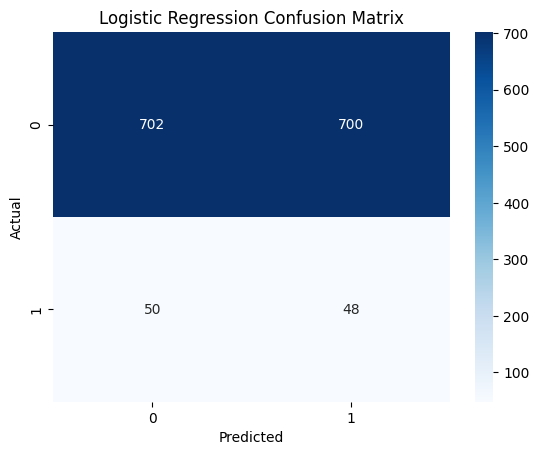

In [27]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
evaluate_model("Logistic Regression", lr, X_test, y_test)


Decision Tree Results
Accuracy: 0.642
ROC-AUC: 0.4999781653032112

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.67      0.78      1402
           1       0.06      0.30      0.10        98

    accuracy                           0.64      1500
   macro avg       0.49      0.48      0.44      1500
weighted avg       0.87      0.64      0.73      1500



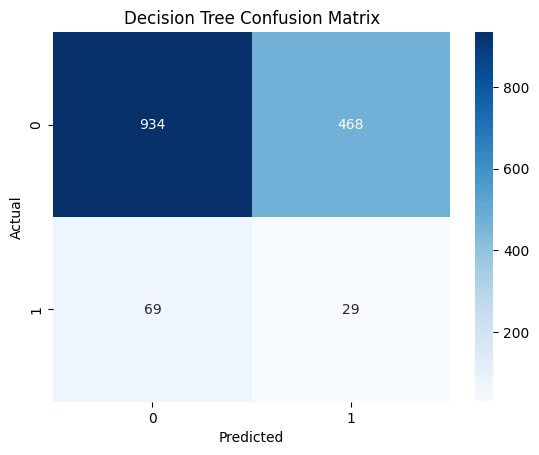

In [28]:
dt = DecisionTreeClassifier(max_depth=8, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree", dt, X_test, y_test)


Random Forest Results
Accuracy: 0.9346666666666666
ROC-AUC: 0.5108081749104778

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      1402
           1       0.00      0.00      0.00        98

    accuracy                           0.93      1500
   macro avg       0.47      0.50      0.48      1500
weighted avg       0.87      0.93      0.90      1500



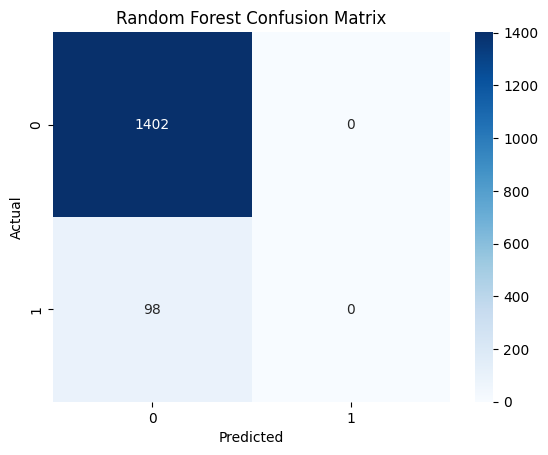

In [29]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_test, y_test)



Gradient Boosting Results
Accuracy: 0.8213333333333334
ROC-AUC: 0.5199423564004775

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1402
           1       0.06      0.12      0.08        98

    accuracy                           0.82      1500
   macro avg       0.50      0.50      0.49      1500
weighted avg       0.88      0.82      0.85      1500



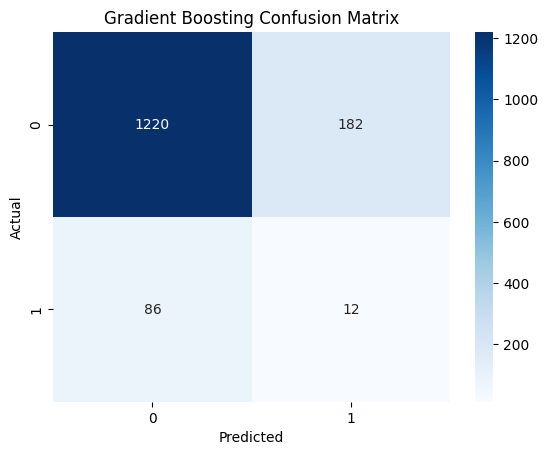

In [30]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_sm, y_train_sm)
evaluate_model("Gradient Boosting", gb, X_test, y_test)



XGBoost Results
Accuracy: 0.8746666666666667
ROC-AUC: 0.48913359923141864

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1402
           1       0.07      0.07      0.07        98

    accuracy                           0.87      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.88      0.87      0.88      1500



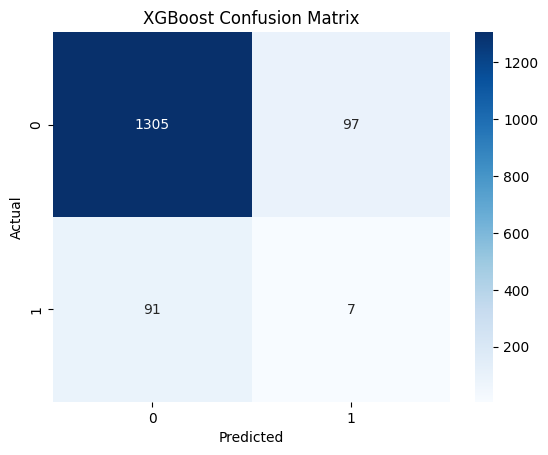

In [31]:
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
evaluate_model("XGBoost", xgb, X_test, y_test)


SVM Results
Accuracy: 0.6753333333333333
ROC-AUC: 0.5017540539753704

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80      1402
           1       0.06      0.29      0.10        98

    accuracy                           0.68      1500
   macro avg       0.50      0.49      0.45      1500
weighted avg       0.88      0.68      0.76      1500



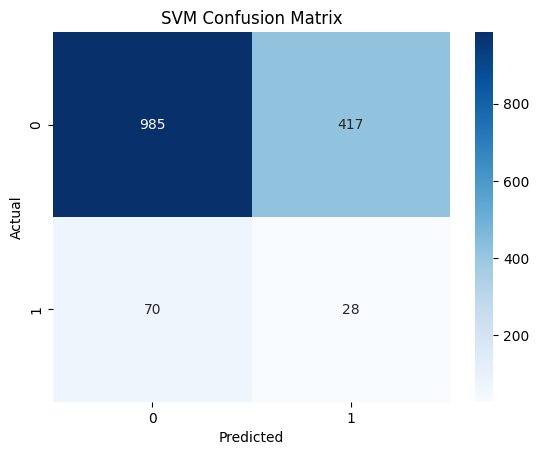

In [32]:
svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)
evaluate_model("SVM", svm, X_test_scaled, y_test)



KNN Results
Accuracy: 0.932
ROC-AUC: 0.4991266121284462

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1402
           1       0.00      0.00      0.00        98

    accuracy                           0.93      1500
   macro avg       0.47      0.50      0.48      1500
weighted avg       0.87      0.93      0.90      1500



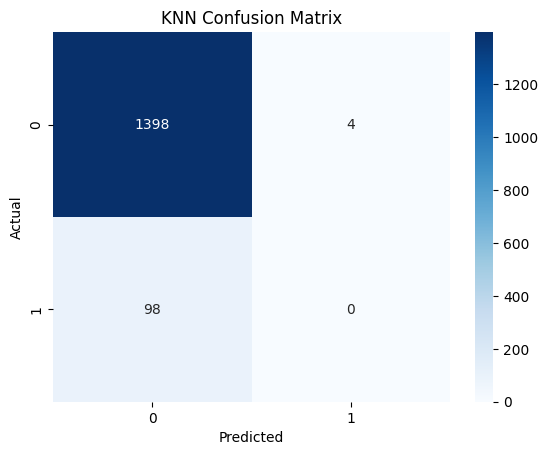

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
evaluate_model("KNN", knn, X_test_scaled, y_test)



Random Forest + SMOTE Results
Accuracy: 0.7906666666666666
ROC-AUC: 0.5123802730792745

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      1402
           1       0.07      0.17      0.10        98

    accuracy                           0.79      1500
   macro avg       0.50      0.50      0.49      1500
weighted avg       0.88      0.79      0.83      1500



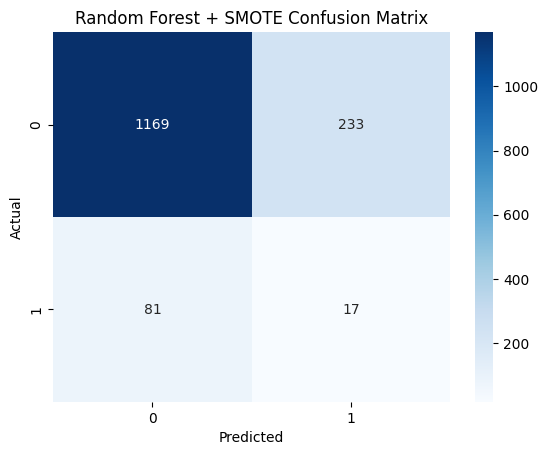

In [34]:
rf_sm = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)
evaluate_model("Random Forest + SMOTE", rf_sm, X_test, y_test)

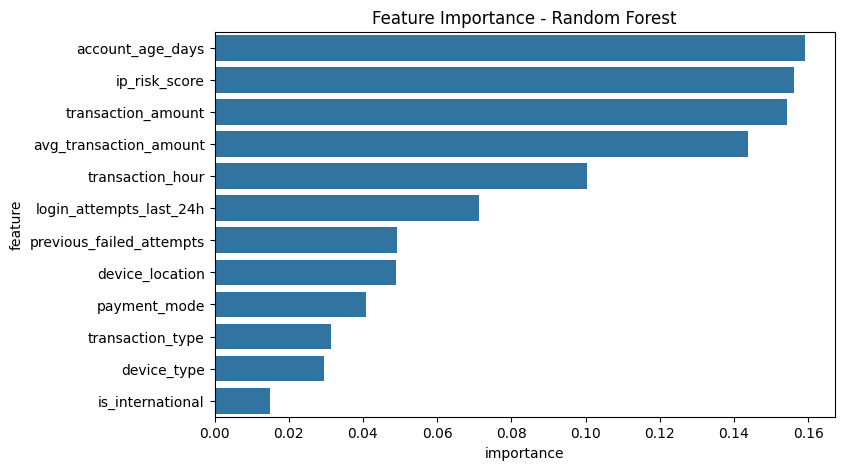

In [35]:
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({
    "feature": features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="importance", y="feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()

In [36]:
y_prob = xgb.predict_proba(X_test)[:,1]

threshold = 0.3
y_pred_custom = (y_prob > threshold).astype(int)

print("\nXGBoost with Custom Threshold (0.3)")
print(classification_report(y_test, y_pred_custom))


XGBoost with Custom Threshold (0.3)
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1402
           1       0.06      0.26      0.10        98

    accuracy                           0.70      1500
   macro avg       0.50      0.49      0.46      1500
weighted avg       0.88      0.70      0.77      1500



## Thank you..pls upvote!!!